In [1]:
# play audio in ipython notebook
try:
    import winsound
except ImportError:
    !pip install winsound
    import winsound
duration = 1000  # milliseconds
freq = 440  # Hz

try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

In [2]:
import numpy as np
import time
import requests
import os
import pickle
from lxml import html
import numpy as np
import urllib.request
import face_recognition
import cv2
import matplotlib.pyplot as plt
import pytesseract
from googlesearch import search
from PIL import Image, ImageStat
import time
tt = time.time
st = tt()

time: 10 s


In [3]:
# get prof name from thumbnail
def save_as_pickle(file_path, file):
    with open(file_path, 'wb') as f:
        pickle.dump(file, f)

def load_from_pickle(file_path):
    with open(file_path, 'rb') as f:
        file = pickle.load(f)
    return file

def plot_image_list(img_list, figsize=(12, 12), subplot_n_cols=2):
    plt.figure(figsize=(12, 12))
    for i,img in enumerate(img_list):
        plt.subplot(int(len(img_list)/subplot_n_cols)+1, subplot_n_cols, i+1)
        try:
            plt.imshow(img)
        except:
            pass
        
def make_rgb_bgr(img):
    b,g,r = cv2.split(img)          
    rgb_img = cv2.merge([r,g,b]) 
    return rgb_img

def brightness(img):
    img = Image.fromarray(img)
    img = img.convert('L')
    stat = ImageStat.Stat(img)
    return stat.rms[0]

def is_valid_img(img, lthresh = 50, hthresh = 200):
    bright = brightness(img)
    if bright<lthresh or bright>hthresh:
        return False
    else:
        return True
        
def get_extension_files(path_to_json, ext='.json'):
    json_files = [os.path.join(path_to_json, pos_json) for pos_json in os.listdir(path_to_json) if pos_json.endswith(ext)]
    return json_files

def flatten_list(l):
    return [item for sublist in l for item in sublist]

def get_prof_name(text, title=False):
    hon_list = ['prof','dr']
    ext_list = ['.', ':', ' ', '']
    hon_list = flatten_list([[w+ext for ext in ext_list] for w in hon_list])
    
    word_before_list = ['assosiate', 'adjunct', 'professor', 'faculty', 'dept.', 'department']
    ishon=False
    text = text.split(' ')
    text_copy = text.copy()
    for hon in hon_list:
        if hon in text:       
#             print(f" honorific in text: {text_copy}")
            idx = text.index(hon)
            text = text[idx:]
            if title:
                text = " ".join(text)
                return text
                
            else:
                # get all words before a specified word
                for wb in word_before_list:
                    if wb in text:
                        wbidx = text.index(wb)
                        text = " ".join(text[:wbidx])
                        text = ''.join([x for x in text if x.isalpha() or x in ext_list])  # get rid of non apha chars
#                         print(f" honorific and word_brfore in text: {text_copy}")
                        return text
                
                # if last name is less than 4 letters dont include
                if len(text)>3:
                    if len(text[3])<4:
                        text = text[:3]
                    else:
                        text = text[:4]
                return " ".join(text)
            
    return None
    
def get_name_fom_image(img):
    
    tesseract_file_path = "C:/Users/YASH/AppData/Local/Tesseract-OCR/tesseract.exe"
    pytesseract.pytesseract.tesseract_cmd = tesseract_file_path
#     img = subimg(img, u=0.7)

    # Convert the image to gray scale 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

    # Performing OTSU threshold 
    ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY) 

    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18)) 

    # Appplying dilation on the threshold image 
    dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 
    # dilation = thresh1

    # Finding contours 
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,  
                                                     cv2.CHAIN_APPROX_NONE) 

    # Creating a copy of image 
    im2 = img.copy() 
    text = None
    for cnt in contours: 
        x, y, w, h = cv2.boundingRect(cnt) 

        # Drawing a rectangle on copied image 
        rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2) 

        # Cropping the text block for giving input to OCR 
        cropped = im2[y:y + h, x:x + w] 

        # Apply OCR on the cropped image 
        text_sub = pytesseract.image_to_string(cropped)
        text_sub = text_sub.lower().replace("\n"," ").strip()
        if text_sub=='':
            continue
        text_sub_name = get_prof_name(text_sub)
        if text_sub_name is not None:
            text = text_sub_name
            break
    
    return text

def post_processing(img):
    norm_img = np.zeros((img.shape[0], img.shape[1]))
    norm_img = cv2.normalize(img, norm_img, 0, 255,
                             cv2.NORM_MINMAX)
    return img


time: 47.4 ms


In [4]:
# %%capture cap --no-stderr

# # get NAMES ONLY

# base_dir = 'C:\\Users\\YASH\\nptel_face_recognition'

# full_vedios_dir = os.path.join(base_dir, "full_vedio")
# known_faces_dir = os.path.join(base_dir, "known_faces")
# tracebacks_dir = os.path.join(base_dir, "tracebacks")
# os.makedirs(tracebacks_dir, exist_ok = True)

# pkl_files_dir = os.path.join(base_dir, "pkl_files")
# nptel_channel_name_list = load_from_pickle(os.path.join(pkl_files_dir, "nptel_channel_name_list.pkl"))
# # num_channels = 2
# # num_playlists = 2
# # num_vedios = 2
    
# num_channels = 5
# num_playlists = 5
# num_vedios = 5

# playlist_2_prof_name_dict={}
# # for nptel_channel_name in nptel_channel_name_list:
# for nptel_channel_name in nptel_channel_name_list[:num_channels]:
#     print(f'\n\n\nfor nptel_channel_name {nptel_channel_name}')
#     chanel_vedio_dir = os.path.join(full_vedios_dir, nptel_channel_name)
#     playlist_path_list = [x[0] for x in os.walk(chanel_vedio_dir)][1:]

#     print(f'number of playlist: {len(playlist_path_list)}')
#     vedio_ext = '.mp4'
    
#     namef=0
#     namenf=0
#     namef_playlist_names_list=[]
#     namenf_playlist_names_list=[]
#     for playlist_path in playlist_path_list[:num_playlists]:
#         gotname = False
#         playlistn = playlist_path.split('\\')[-1]
#         print(f"\npaylist: {playlistn}")
#         vedio_path_list = get_extension_files(playlist_path, ext=vedio_ext)
#         print(f"number of vedios: {len(vedio_path_list)}")
        
#         vst = 5
#         search_interval = 20
#         vet = vst + search_interval

#         num_f_per_sec = 1
#         num_f_inc = 3
        

#         text_sub = get_prof_name(playlistn.lower(), title=True)
#         if text_sub is not None:
#             print(f'name: {text_sub} in the title')
#             prof_name = text_sub 
#             gotname = True

#         for vedio_path in vedio_path_list[:num_vedios]:
#             if gotname:
#                 continue
#             else:
#                 num_f_per_sec+=num_f_inc

#             vfname = vedio_path.split('\\')[-1]
#             print(f"vedio: {vfname}")
#             print(f"(vst, vet, num_f_per_sec): {(vst, vet, num_f_per_sec)}")
#             video_capture = cv2.VideoCapture(vedio_path)
#             fps = int(video_capture.get(cv2.CAP_PROP_FPS))
#             st = tt()
#             i=-1
#             while video_capture.isOpened():
#                 i+=1
#                 if int(i/fps) < vst:
#                     ret, frame = video_capture.read()
#                     continue

#                 if int(i/fps) > vet:
#                     break

#                 ret, frame = video_capture.read()

#                 if i%int(fps/num_f_per_sec)==0:
#     #                 print(f"time(sec): {int(i/fps)}")
#                     if not gotname:
#                         text = get_name_fom_image(frame)
#                         if text is not None:
#                             print(f'name: {text} at time: {int(i/fps)}')
#                             prof_name = text
#                             gotname = True
#                             break

#                 if cv2.waitKey(1) & 0xFF == ord('q'):
#                     break

#             video_capture.release()
#             cv2.destroyAllWindows()

#         if gotname:
#             print(f"face not found for {prof_name}")
#             namef+=1
#             namef_playlist_names_list.append(playlistn)
#             playlist_2_prof_name_dict[playlistn] = prof_name
#         else:
#             print(f"face and name not found for {playlist_path}")
#             namenf+=1
#             playlist_2_prof_name_dict[playlistn] = None
#             playlist_2_prof_name_dict.append(playlistn)
#             namenf+=1
    
#     chanel_pkl_files_dir = os.path.join(pkl_files_dir, nptel_channel_name)
#     save_as_pickle(os.path.join(chanel_pkl_files_dir, "namef_playlist_names_list.pkl"), namef_playlist_names_list)
#     save_as_pickle(os.path.join(chanel_pkl_files_dir, "namenf_playlist_names_list.pkl"), namenf_playlist_names_list)
#     print(f"\nfor channel: {nptel_channel_name}  names found: {namef}, names not found: {namenf}")    

# prof_name_2_playlist_dict = {v: k for k, v in playlist_2_prof_name_dict.items()}
# save_as_pickle(os.path.join(pkl_files_dir, "prof_name_2_playlist_dict.pkl"), prof_name_2_playlist_dict)
# save_as_pickle(os.path.join(pkl_files_dir, "playlist_2_prof_name_dict.pkl"), playlist_2_prof_name_dict)
    
# winsound.Beep(freq, duration)

time: 9.12 ms


In [5]:
# with open(os.path.join(tracebacks_dir, "prof_names.txt"), 'w', encoding='utf-8') as f:
#     f.write(cap.stdout)

time: 11.1 ms





for nptel_channel_name Aerospace Engineering
number of playlist: 5

playlist: Foundation of Scientific Computing

playlist: Instability and Transition of Fluid Flows
number of vedios: 5
vedio: 2hfaiu6x0ow.mp4
(vst, vet, num_f_per_sec): (5, 30, 2)
vedio: GY0GnH2gEnM.mp4
(vst, vet, num_f_per_sec): (5, 30, 3)
vedio: paHi-4caiSk.mp4
(vst, vet, num_f_per_sec): (5, 30, 4)
vedio: wxt-xeKy0lA.mp4
(vst, vet, num_f_per_sec): (5, 30, 5)
vedio: z77l0_F6qyY.mp4
(vst, vet, num_f_per_sec): (5, 30, 6)
face and name not found for C:\Users\YASH\nptel_face_recognition\data\full_vedio\Aerospace Engineering\Instability and Transition of Fluid Flows

playlist: Introduction to Aerodynamics
number of vedios: 4
vedio: BhWzgo7qkbE.mp4
(vst, vet, num_f_per_sec): (5, 30, 2)
name: prof. k. p. sinhamahapatra at time: 15
vedio: FKH4DjMdk9I.mp4
(vst, vet, num_f_per_sec): (35, 60, 2)
vedio: VhybIE82B6M.mp4
(vst, vet, num_f_per_sec): (65, 90, 2)
vedio: _9qwbichO1s.mp4
(vst, vet, num_f_per_sec): (95, 120, 2)
all face

name: prof. s. dasgupta coma at time: 24
vedio: DhwAp6yQHQI.mp4
(vst, vet, num_f_per_sec): (35, 60, 2)
vedio: Fp1wKo72b2A.mp4
(vst, vet, num_f_per_sec): (65, 90, 2)
vedio: Wj2g9Cf_IDc.mp4
(vst, vet, num_f_per_sec): (95, 120, 2)
vedio: YWEiQlEUFak.mp4
(vst, vet, num_f_per_sec): (125, 150, 2)
num of faces found: 0 for C:\Users\YASH\nptel_face_recognition\data\full_vedio\Chemistry and Biochemistry\BioChemistry I

playlist: Introduction to Organometallic Chemistry
number of vedios: 5
vedio: 8pqCeN7GoMc.mp4
(vst, vet, num_f_per_sec): (5, 30, 2)
name: prof. a. g. samuelson at time: 9
vedio: EL7bSAKCRwE.mp4
(vst, vet, num_f_per_sec): (35, 60, 2)
vedio: etxRR08x7x8.mp4
(vst, vet, num_f_per_sec): (65, 90, 2)
vedio: nadRJbFKaug.mp4
(vst, vet, num_f_per_sec): (95, 120, 2)
vedio: xdaCCHxEpTk.mp4
(vst, vet, num_f_per_sec): (125, 150, 2)
num of faces found: 5 for C:\Users\YASH\nptel_face_recognition\data\full_vedio\Chemistry and Biochemistry\Introduction to Organometallic Chemistry

playlist: Stereo

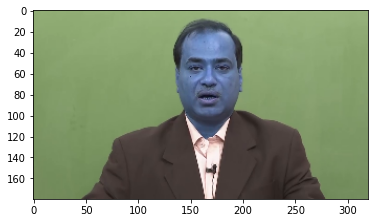

time: 50min 28s


In [6]:
# %%capture cap --no-stderr

# save faces and names

base_dir = 'C:\\Users\\YASH\\nptel_face_recognition\\data'

full_vedios_dir = os.path.join(base_dir, "full_vedio")
known_faces_dir = os.path.join(base_dir, "known_faces2")
tracebacks_dir = os.path.join(base_dir, "tracebacks")
os.makedirs(known_faces_dir, exist_ok = True)
os.makedirs(tracebacks_dir, exist_ok = True)

pkl_files_dir = os.path.join(base_dir, "pkl_files")
nptel_channel_name_list = load_from_pickle(os.path.join(pkl_files_dir, "nptel_channel_name_list.pkl"))
folder_name_2_prof_name_dict = {}
folder_name_cnt = 0
skip_playlists = ["Foundation of Scientific Computing"]

num_channels = 5
num_playlists = 5
num_vedios = 5

ori_num_faces = 5
ori_num_vedios_for_faces = 2

playlist_2_prof_name_dict={}
tfacef=0
tnamef=0
tnamenf=0
# for nptel_channel_name in nptel_channel_name_list:
for nptel_channel_name in nptel_channel_name_list[:num_channels]:
    print(f'\n\n\nfor nptel_channel_name {nptel_channel_name}')
    chanel_vedio_dir = os.path.join(full_vedios_dir, nptel_channel_name)
    playlist_path_list = [x[0] for x in os.walk(chanel_vedio_dir)][1:]

    print(f'number of playlist: {len(playlist_path_list)}')
    vedio_ext = '.mp4'
    
    facef=0
    namef=0
    namenf=0
    facef_playlist_names_list=[]
    namef_playlist_names_list=[]
    namenf_playlist_names_list=[]
    for playlist_path in playlist_path_list[:num_playlists]:
        gotname = False
        gotface = False
        gotallfaces =False
        playlistn = playlist_path.split('\\')[-1]
        print(f"\nplaylist: {playlistn}")
        if playlistn in skip_playlists:
            continue
        vedio_path_list = get_extension_files(playlist_path, ext=vedio_ext)
        print(f"number of vedios: {len(vedio_path_list)}")
        
        vst = 5
        search_interval = 30
        vet = 30

        num_f_per_sec = 1
        num_f_inc = 1
        
        total_num_faces = 0
        num_vedios_for_faces = ori_num_vedios_for_faces
        prof_folder_made = False

        text_sub = get_prof_name(playlistn.lower(), title=True)
        if text_sub is not None:
            print(f'name: {text_sub} in the title')
            prof_name = text_sub 
            gotname = True

        for vedio_path in vedio_path_list[:num_vedios]:
            if gotallfaces:
                continue
            else:
                if gotname:
                    vst+=search_interval
                    vet+=search_interval
#                     num_f_per_sec+=num_f_inc
                    pass
                else:
                    num_f_per_sec+=num_f_inc
            
            num_faces = ori_num_faces
            vfname = vedio_path.split('\\')[-1]
            print(f"vedio: {vfname}")
            print(f"(vst, vet, num_f_per_sec): {(vst, vet, num_f_per_sec)}")
            video_capture = cv2.VideoCapture(vedio_path)
            fps = int(video_capture.get(cv2.CAP_PROP_FPS))
            st = tt()
            i=-1
            while video_capture.isOpened():
                i+=1
                if int(i/fps) < vst:
                    ret, frame = video_capture.read()
                    continue

                if int(i/fps) > vet:
                    break

                ret, frame = video_capture.read()

                if i%int(fps/num_f_per_sec)==0:
    #                 print(f"time(sec): {int(i/fps)}")
                    if not gotname:
                        text = get_name_fom_image(frame)
                        if text is not None:
                            print(f'name: {text} at time: {int(i/fps)}')
                            prof_name = text
                            gotname = True

                    else:
                        if not is_valid_img(frame):
                            continue
                            
                        # Resize frame of video to 1/4 size for faster face recognition processing
                        small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

                        # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
                        rgb_small_frame = small_frame[:, :, ::-1]
                            
                        face_locations = face_recognition.face_locations(rgb_small_frame)
                        if len(face_locations)==1:
                            
                            # check if encoding is empty
                            enc = face_recognition.face_encodings(rgb_small_frame, face_locations)
                            if enc==[]:
                                continue
                                
                            if not prof_folder_made:
                                folder_name_2_prof_name_dict[folder_name_cnt] = prof_name

                                # some chaectors in name make invalid dir names
                                prof_faces_dir = os.path.join(known_faces_dir, str(folder_name_cnt))
                                folder_name_cnt+=1
                                os.makedirs(prof_faces_dir, exist_ok = True)
                                prof_folder_made = True
                            
                            image_path = os.path.join(prof_faces_dir, str(num_vedios_for_faces*10+num_faces)+'.jpg')
                            small_frame = post_processing(small_frame)
                            plt.imshow(small_frame)
                            cv2.imwrite(image_path, small_frame)
                            gotface=True
                            num_faces-=1
                            total_num_faces+=1
#                             print(f'face at time: {int(i/fps)}')
                            if num_faces<=0:
                                num_vedios_for_faces-=1
                                if num_vedios_for_faces==0:
                                    gotallfaces = True
                                break

                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

            video_capture.release()
            cv2.destroyAllWindows()

        if gotallfaces:
            facef+=1
            print(f"all faces found for {playlist_path}")
            facef_playlist_names_list.append(playlistn)
            playlist_2_prof_name_dict[playlistn] = prof_name
            
        else:
            if gotname:
                print(f"num of faces found: {total_num_faces} for {playlist_path}")
                namef+=1
                namef_playlist_names_list.append(playlistn)
                playlist_2_prof_name_dict[playlistn] = prof_name
            else:
                print(f"face and name not found for {playlist_path}")
                playlist_2_prof_name_dict[playlistn] = None
                namenf_playlist_names_list.append(playlistn)
                namenf+=1
    
    tfacef+=facef
    tnamef+=namef
    tnamenf+=namenf
    print(f"\nfor channel: {nptel_channel_name}  faces found: {facef}, names found: {namef}, names not found: {namenf}")    

    chanel_pkl_files_dir = os.path.join(pkl_files_dir, nptel_channel_name)
#     save_as_pickle(os.path.join(chanel_pkl_files_dir, "facef_playlist_names_list.pkl"), facef_playlist_names_list)
#     save_as_pickle(os.path.join(chanel_pkl_files_dir, "namef_playlist_names_list.pkl"), namef_playlist_names_list)
#     save_as_pickle(os.path.join(chanel_pkl_files_dir, "namenf_playlist_names_list.pkl"), namenf_playlist_names_list)

print(f"\ntotal faces found: {tfacef}, names found: {tnamef}, names not found: {tnamenf}")
prof_name_2_playlist_dict = {v: k for k, v in playlist_2_prof_name_dict.items()}
# save_as_pickle(os.path.join(pkl_files_dir, "prof_name_2_playlist_dict.pkl"), prof_name_2_playlist_dict)
# save_as_pickle(os.path.join(pkl_files_dir, "playlist_2_prof_name_dict.pkl"), playlist_2_prof_name_dict)


prof_name_2_folder_name_dict = {v: k for k, v in folder_name_2_prof_name_dict.items()}
save_as_pickle(os.path.join(pkl_files_dir, "folder_name_2_prof_name_dict.pkl"), folder_name_2_prof_name_dict)
save_as_pickle(os.path.join(pkl_files_dir, "prof_name_2_folder_name_dict.pkl"), prof_name_2_folder_name_dict)
    
winsound.Beep(freq, duration)

In [7]:
with open(os.path.join(tracebacks_dir, "prof_names_faces.txt"), 'w', encoding='utf-8') as f:
    f.write(cap.stdout)

NameError: name 'cap' is not defined

time: 234 ms
